<a href="https://colab.research.google.com/github/MissSamyuktha/SpotifyWrapUp-Data-Analysis/blob/main/Spotify_WrapUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive/SpotifyWrapUpProject/spotify_history.csv

/content/drive/MyDrive/SpotifyWrapUpProject/spotify_history.csv


# ***Data Preprocessing ***
Data cleaning by dropping duplicates, filling missing values, formatting text by removing leading and trailing whitespaces, same uppercase, lowercase format, unique values.


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SpotifyWrapUpProject/spotify_history.csv')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
#Understand data
#df.head()

In [150]:
#df.info()

In [9]:
df['album_name'].nunique()

7948

In [10]:
df['artist_name'].nunique()

4113

In [11]:
df['track_name'].nunique()

13839

In [12]:
df.duplicated().sum()

1185

In [13]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [151]:
#df.info()

In [15]:
#quick glance of rows with missing values
df1 = df[df.isna().any(axis=1)]
df1.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
577,0Cng3O0fIHllQx3S78RvmL,2015-08-12 02:26:11,iOS,283466,From Eden,Hozier,Hozier,NaN,trackdone,False,False
596,4VSg5K1hnbmIg4PwRdY6wV,2015-08-12 05:03:15,iOS,40681,Shades Of Cool,Lana Del Rey,Ultraviolence,trackdone,NaN,False,True
597,1NA2NvAgCB4EfcBC8OHfuj,2015-08-12 05:07:44,iOS,268173,Staying Up,The Neighbourhood,I Love You.,NaN,trackdone,False,False
605,2YuyaXVPEDnuO3cFuQ3BTW,2015-08-12 05:23:23,iOS,41145,El Karma,Noel Torres,La Balanza,trackdone,NaN,False,True
606,4YfMIrgiCbzo4td18hwwvA,2015-08-12 05:24:10,iOS,46997,Tentándome,Juan Magán,The King Is Back,NaN,endplay,False,True


In [16]:
#Filling missing values
df[['reason_start', 'reason_end']] = df[['reason_start', 'reason_end']].fillna('unknown')

In [147]:

#df.info()

In [18]:
df['platform'].unique()

array(['web player', 'windows', 'android', 'iOS', 'cast to device', 'mac'],
      dtype=object)

In [19]:
df['reason_start'].unique()

array(['autoplay', 'clickrow', 'trackdone', 'nextbtn', 'backbtn',
       'unknown', 'popup', 'appload', 'fwdbtn', 'trackerror', 'remote',
       'endplay', 'playbtn'], dtype=object)

In [20]:
df['reason_end'].unique()

array(['clickrow', 'unknown', 'nextbtn', 'trackdone', 'backbtn', 'reload',
       'popup', 'endplay', 'fwdbtn', 'appload',
       'unexpected-exit-while-paused', 'unexpected-exit', 'logout',
       'remote', 'trackerror'], dtype=object)

In [21]:
#Cleaning up redunduncies and proper grouping
df[['reason_start', 'reason_end']] = df[['reason_start', 'reason_end']].replace('Unknown', 'unknown')

In [148]:
#df.head()

In [23]:
#Cleaning up extra whitespaces and formatting the text to standard title format
df['album_name'] = df['album_name'].str.strip().str.title()  # Remove whitespace Convert to title case
df['album_name'].nunique()

7907

In [24]:
df['artist_name'] = df['artist_name'].str.strip().str.title()  # Remove whitespace and convert to title case
df['artist_name'].nunique()

4112

In [25]:
df['track_name'] = df['track_name'].str.strip().str.title()  # Convert to title case
df['track_name'].nunique()

13665

In [146]:
#df[df.duplicated].count()


# Analytics
# Drawing Insights From Spotify Over The Years
Questions to ask?

1. Most used platform for playing Spotify?
2. Most played track?
3. Famous artist?
4. Popular album?
5. Most skipped track?
6. Most shuffled track?
7. Most common reason to start playing a track?
8. Most common reason to stop playing a track?
9. Preferred time to play music?
10. Month with highest playtime?
11. Year with highest playtime?
12. Popular day in a week to play music?

-->Trend over the years, months, days of a week ->visualisations using matplotlib







In [132]:
#Most used platform for playing Spotify
df['platform'].value_counts()

,count
platform,
android,139562
iOS,3049
cast to device,3015
windows,1691
mac,1176
web player,182


In [247]:
#Visualization in matplotlib
#plt.pie(df['platform'].value_counts(), labels=df['platform'].value_counts().index, autopct='%1.1f%%')

**Insights**:

Most used platform to play spotify track is *Android* with around 94% user base

Least used platform is *web player*

In [135]:
#Most common reason for start playing a track
df['reason_start'].value_counts().idxmax()

'trackdone'

In [136]:
#Most Common Reason to Stop Playing a Track
df['reason_end'].value_counts().idxmax()

'trackdone'

**Insights**

Main reason for both starting and ending the song track is "***trackdone"***

# Feature Engineering

**Creating new columns**

1. minutes_played is created by converting milliseconds into minutes for convenience.

2. Converted ts into datetime and extracted year, month, day_name and time_period information for drawing better insights.

3. Grouped the hours of a day into 4 groups namely morning, afternoon, evening, late night to better user user preferences.

In [33]:
#Creating a new column named minutes_played by converting ms_played into minutes
df['minutes_played'] = df['ms_played'] / 60000

In [152]:
#df.head()

In [35]:
# Ensure the 'ts' column is in datetime format
df['ts'] = pd.to_datetime(df['ts'])

In [36]:
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['day_of_week'] = df['ts'].dt.day_name()



In [37]:
# Extract the hour from the timestamp
df['hour'] = df['ts'].dt.hour

# Define a function to classify the hour
def classify_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Late Night'

# Apply the function to create a new column
df['time_period'] = df['hour'].apply(classify_time)

# Drop the 'hour' column and day column-no longer needed
df.drop(columns=['hour', 'day'], inplace=True)


In [126]:
#Most Played Track
df.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).idxmax()

'Ode To The Mets'

**Insights**

Most popular track is ***"Ode To The Mets"***

In [128]:
#Famous Artist
df.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).idxmax()

'The Beatles'

**Insights**

Most popular artist is "**The Beatles**"


In [131]:
#Popular Album
df.groupby('album_name')['minutes_played'].sum().sort_values(ascending=False).idxmax()

'The Beatles'

**Insights**

Most played album is ** The Beatles**.


In [109]:
#Most Skipped Track
# Group by 'track_name' and sum the boolean column to count 'True' values
#df.groupby('track_name')['skipped'].sum().sort_values(ascending=False)

In [110]:
df['track_name'][df['skipped'] == True].value_counts().idxmax()

'Paraíso'

In [111]:
#Most shuffled track
df['track_name'][df['shuffle'] == True].value_counts().idxmax()

'In The Blood'

**Insights**

Most skipped track on spotify is **"Paraíso"**.

Most shuffled track on spotify is **"In The Blood"**.

# Trend over the years, months, days of week and preferred time of day

In [92]:
#month with highest playtime
df.groupby('month')['minutes_played'].sum().idxmax()

10

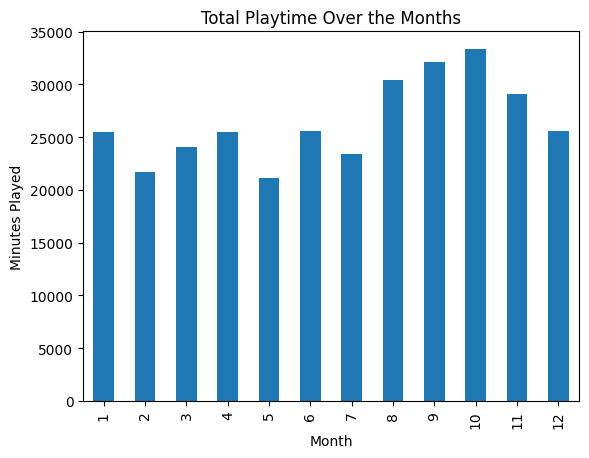

In [94]:
#Total Playtime Over the Months
#trend over the months
#Plotting
df.groupby('month')['minutes_played'].sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Minutes Played')
plt.title('Total Playtime Over the Months')
plt.legend().remove()
plt.show()

**Insights**

People tend to like music more in ***Fall season*** with ***October*** being the top and *September and August* stands next to it.

In [99]:
#Most Preferred day to listen music
df.groupby('day_of_week')['minutes_played'].sum().idxmax()

'Friday'

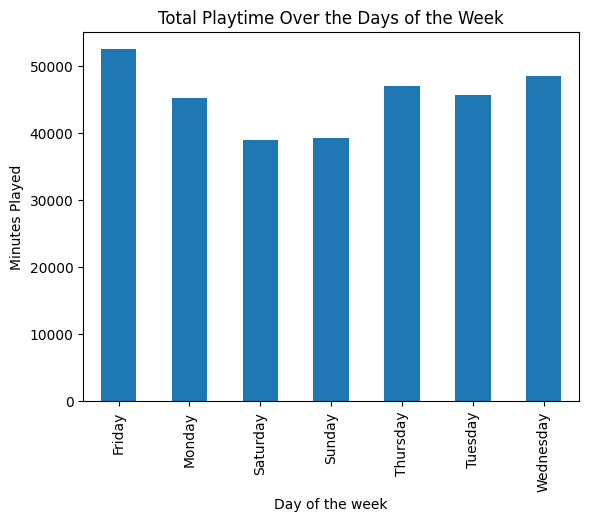

In [100]:
#Total Playtime over the Days of the Week
#Plotting the trend
df.groupby('day_of_week')['minutes_played'].sum().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Minutes Played')
plt.title('Total Playtime Over the Days of the Week')
plt.legend().remove()
plt.show()

In [108]:
#Preferred Time to Play Music
df[df['day_of_week'] == 'Friday'].groupby('time_period')['minutes_played'].sum().idxmax()

'Late Night'

In [103]:
#Preferred time of day to play music
df.groupby('time_period')['minutes_played'].sum().idxmax()

'Late Night'

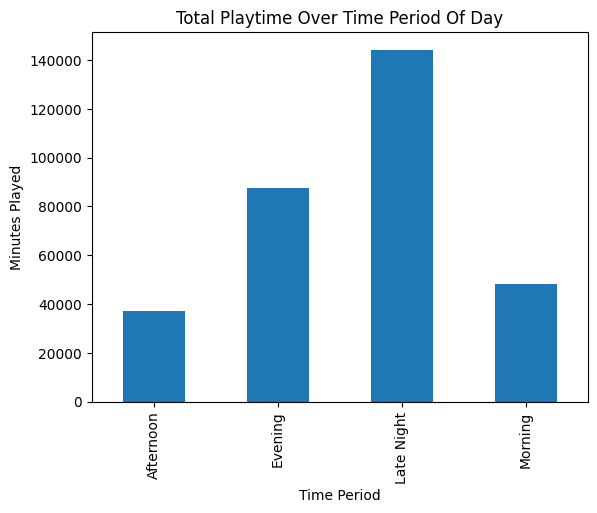

In [101]:
#Total Playtime over the Days of the Week
#Plotting the trend
df.groupby('time_period')['minutes_played'].sum().plot(kind='bar')
plt.xlabel('Time Period')
plt.ylabel('Minutes Played')
plt.title('Total Playtime Over Time Period Of Day')
plt.legend().remove()
plt.show()

**Insights**

**Friday nights** are the indeed musical nights with highest play time recorded on end of work week - Late Nights of Friday.

Also, in general people prefer to listen music on **late nights** post 9 pm.

In [89]:
#Year With Highest Playtime
df.groupby('year')['minutes_played'].sum().idxmax()

2021

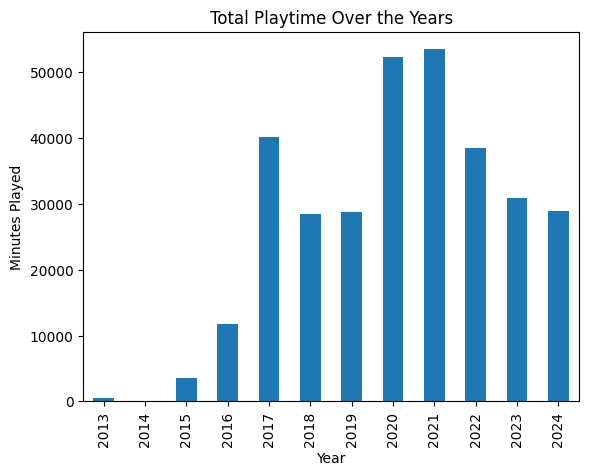

In [ ]:
#Sum, Average, min, max playtime in a day, month, year
df.groupby('year').agg({'minutes_played': ['sum', 'mean', 'min', 'max']})
#trend over the years
df.groupby('year').agg({'minutes_played': ['sum']}).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Minutes Played')
plt.title('Total Playtime Over the Years')
plt.legend().remove()
plt.show()

**Insights**

Year with most music runtine is 2021.

**Insights**

Favourite play time over the years can be better understood with below visualisation - *Late Night* being the preferred choice *consistently* over the years.

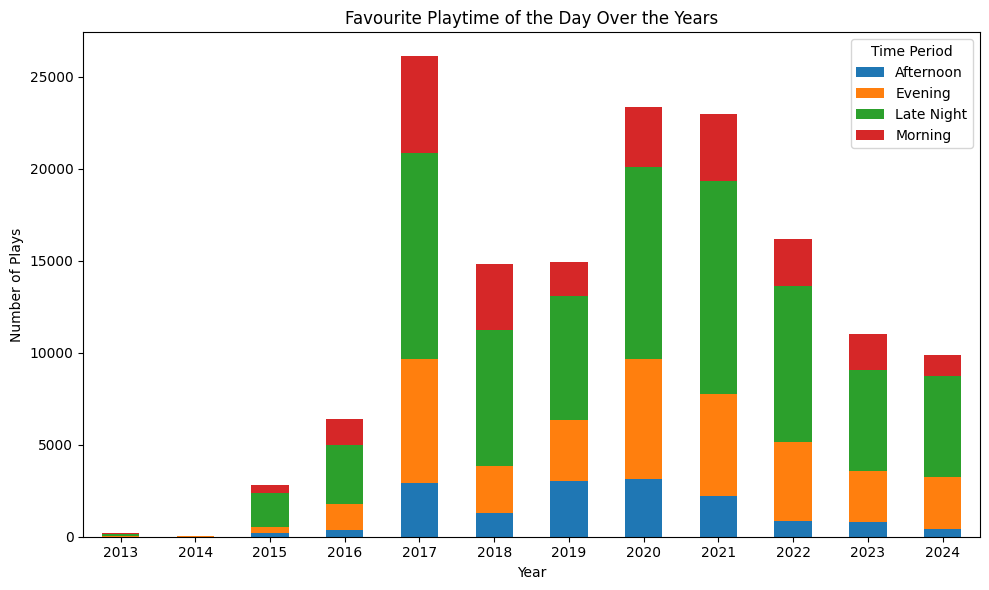

In [53]:
#Favourite playtime over the years
# Group data by year and time period, then count occurrences
#Plotting
df.groupby(['year', 'time_period']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), title='Favourite Playtime of the Day Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Time Period')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Insights from Spotify 2013-2024

1. Most used platform for playing Spotify is **"Android"**

2. Most played track is **"Ode To The Mets"**

3. Famous artist is **"The Beatles"**

4. Popular album is **"The Beatles"**

5. Most skipped track are **"Paraíso"**

6. Most shuffled track is **"In The Blood"**

7. Most common reason to start playing a track is **"trackdone"**.

8. Most common reason to stop playing a track is **"trackdone"**.

9. Popular day in a week to play music is **"Friday"**
10. Preferred time to play music in a day is **"Late Night"**

    **"Friday Nights"** are the most musical nights over the years.

11. People tend to like music more in **"Fall season"** with **"October"** being the top and *September* and *August* stands next to it.
12. Year with most music runtine is **"2021"**.

--> **Trend** over the months, days of a week shown through matplot **Visualisations**.


# 2024 Spotify WrapUp

In [54]:
#2024 highlights
#Creating a temporary dataset for the year 2024
df_2024 = df[df['year'] == 2024]
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9870 entries, 139990 to 149859
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   spotify_track_uri  9870 non-null   object        
 1   ts                 9870 non-null   datetime64[ns]
 2   platform           9870 non-null   object        
 3   ms_played          9870 non-null   int64         
 4   track_name         9870 non-null   object        
 5   artist_name        9870 non-null   object        
 6   album_name         9870 non-null   object        
 7   reason_start       9870 non-null   object        
 8   reason_end         9870 non-null   object        
 9   shuffle            9870 non-null   bool          
 10  skipped            9870 non-null   bool          
 11  minutes_played     9870 non-null   float64       
 12  year               9870 non-null   int32         
 13  month              9870 non-null   int32         
 14  day_of

# Analytics

# Drawing Insights from 2024

Questions to ask?

1. Most used platform for playing Spotify?
2. Most played track in 2024?
3. Famous artist in 2024?
4. Popular album in 2024?
5. Most skipped track?
6. Most shuffled track?
7. Most common reason for starting a track?
8. Most common reason for ending a track?
9. Preferred time to play music in a day?
10. Month with highest playtime?
11. Popular day in a week to play music?
12. Trend over the months, days of a week

In [76]:
#quick glance
df_2024[['track_name', 'artist_name', 'album_name']].nunique()

,0
track_name,3568
artist_name,1071
album_name,1824


In [55]:
#1.Most used platform to play Spotify in 2024
df_2024['platform'].value_counts()

,count
platform,
android,9480
mac,390


In [137]:
#2.Most played track in 2024
df_2024.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).idxmax()

'The Return Of The King (Feat. Sir James Galway, Viggo Mortensen And Renee Fleming)'

In [141]:
#3.Famous artist in 2024
df_2024.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).idxmax()

'John Mayer'

In [139]:
#4.Popular album in 2024
df_2024.groupby('album_name')['minutes_played'].sum().sort_values(ascending=False).idxmax()

'Arrival'

In [142]:
#5.Most skipped track in 2024
df_2024['track_name'][df_2024['skipped'] == True].value_counts().idxmax()

'Why Did It Have To Be Me?'

In [143]:
#6.Most shuffled track in 2024
df_2024['track_name'][df_2024['shuffle'] == True].value_counts().idxmax()

'Why Did It Have To Be Me?'

In [144]:
#Most common reason to start playing a track in 2024
df_2024['reason_end'].value_counts().idxmax()

'trackdone'

In [145]:
#Most common reason to stop playing a track in 2024
df_2024['reason_end'].value_counts().idxmax()

'trackdone'

# Trend Over The Months, Days Of Week, Time Period of Day

In [117]:
#Popular day in a week to play music
df_2024.groupby('day_of_week')['minutes_played'].sum().idxmax()

'Friday'

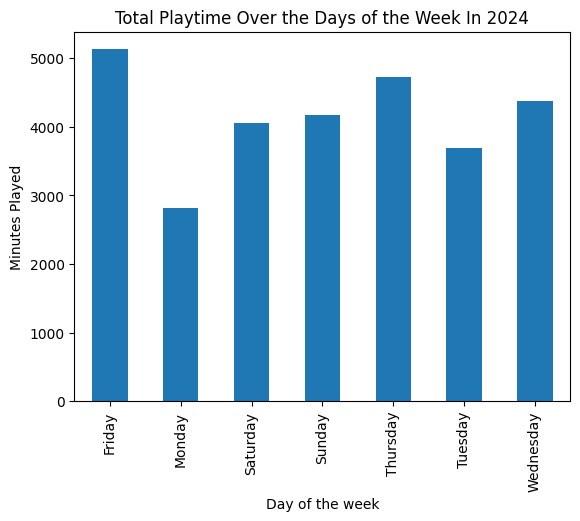

In [118]:
#Trend over the days of the week in 2024
#Plotting
df_2024.groupby('day_of_week')['minutes_played'].sum().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Minutes Played')
plt.title('Total Playtime Over the Days of the Week In 2024')
plt.legend().remove()
plt.show()

In [115]:
#Preferred time to play music in a day
df_2024.groupby('time_period')['minutes_played'].sum().sort_values(ascending=False).idxmax()

'Late Night'

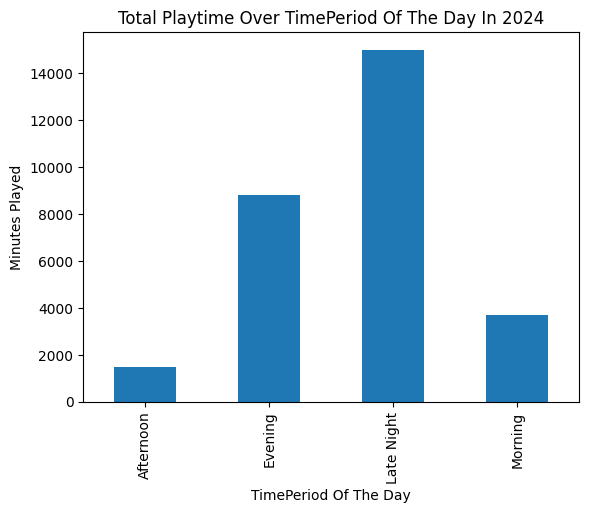

In [116]:
#Trend over timeperiod of the day in 2024
#Plotting
df_2024.groupby('time_period')['minutes_played'].sum().plot(kind='bar')
plt.xlabel('TimePeriod Of The Day')
plt.ylabel('Minutes Played')
plt.title('Total Playtime Over TimePeriod Of The Day In 2024')
plt.legend().remove()
plt.show()

In [121]:
#Month with highest playtime in 2024
df_2024.groupby('month')['minutes_played'].sum().sort_values(ascending=False).idxmax()

1

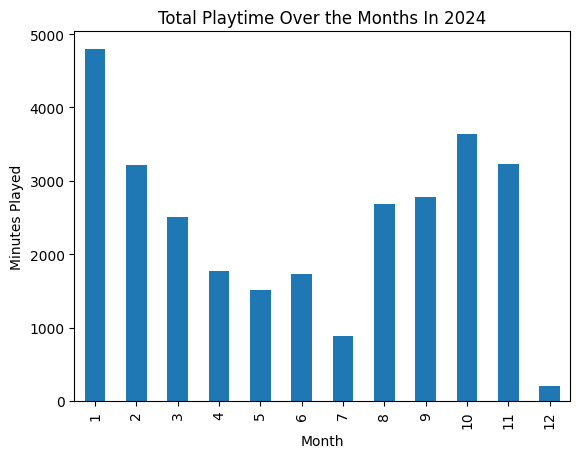

In [122]:
#Trend over the months in 2024
#Plotting
df_2024.groupby('month')['minutes_played'].sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Minutes Played')
plt.title('Total Playtime Over the Months In 2024')
plt.legend().remove()
plt.show()

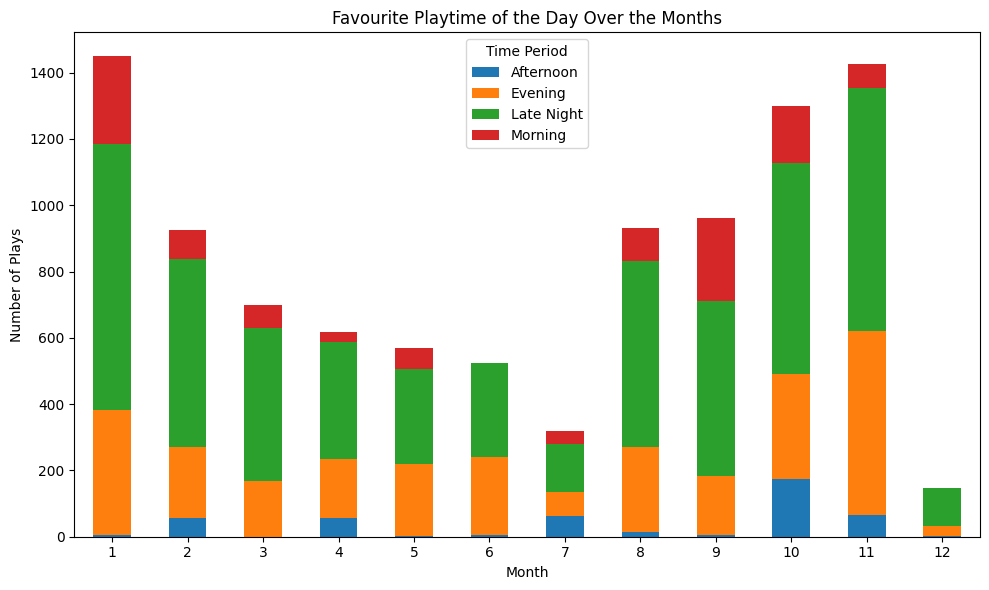

In [73]:
#Favourite playtime over the months
# Group data by month and time period, then count occurrences
#Plotting
df_2024.groupby(['month', 'time_period']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), title='Favourite Playtime of the Day Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Time Period')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

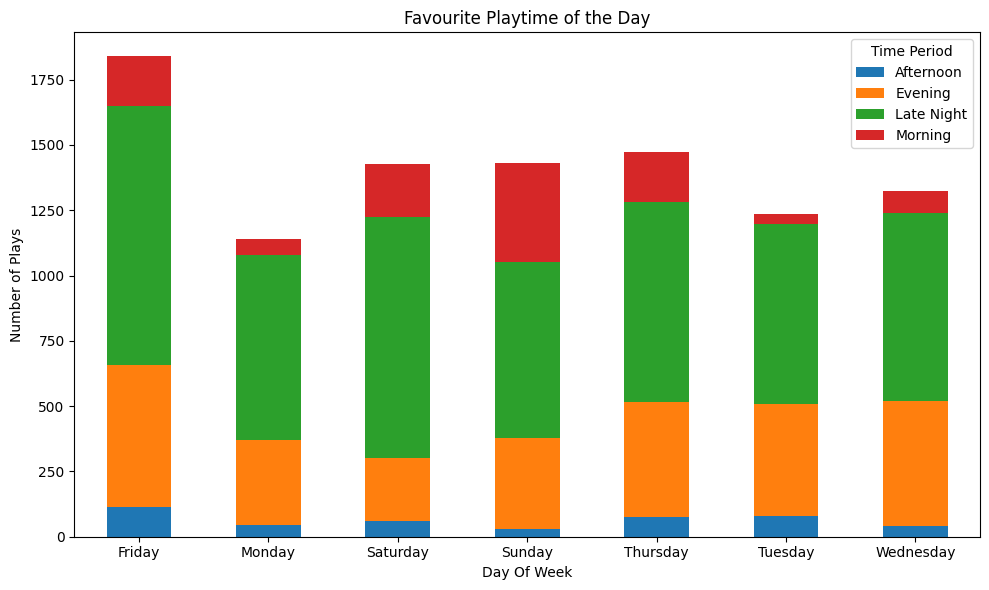

In [74]:
#Favourite playtime over the days of a week
# Group data by day of week and time period, then count occurrences
#Plotting
df_2024.groupby(['day_of_week', 'time_period']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Favourite Playtime of the Day')
plt.xlabel('Day Of Week')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Time Period')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [75]:
#Exporting the cleaned data to csv file for further visualisation in Power BI
#df.to_csv('spotify(2013-2024).csv', index=False)
#df_2024.to_csv('spotify2024.csv', index=False)

# Insights from 2024

1. Most used platform for playing Spotify is **"Android"**

2. Most played track in 2024 is **"The Return Of The King"**

3. Famous artist in 2024 is **"John Mayer"**

4. Popular album in 2024 is **"Arrival"**

5. Most skipped track are **"Why Did It Have To Be Me?"** and **"Fernando"**

6. Most shuffled track is **"Why Did It Have To Be Me?"**

7. Most common reason to start playing a track is **"trackdone"**.

8. Most common reason to stop playing a track is **"trackdone"**.

9. Popular day in a week to play music is **"Friday"**
10. Preferred time to play music in a day is **"Late Night"**

    **"Friday Nights"** are the most musical nights over the years.

11. Month with highest playtime is **"January"**. **"Fall season"** stands next with *Oct, Nov* has next highest playtime.

12. Trend over the months, days of a week shown through matplot **Visualisations**.
